In [1]:

import torch
import sys
from torch.utils.data import DataLoader
from torchvision.transforms import Lambda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
from data import DAGMDataset
from settings import TRAINING_LABEL_FILE_PATH, TEST_LABEL_FILE_PATH
import matplotlib.pyplot as plt
from torchvision.io import read_image
from tqdm.notebook import tqdm

In [2]:
class AEDataset(DAGMDataset):
    def __init__(self, meta_file, transform=None, target_transform=None, defect_only=False,Class=0):
        super(AEDataset, self).__init__(meta_file,transform,target_transform, defect_only)
        self.meta_df = self.meta_df[self.meta_df["class"] == Class]

    def __getitem__(self,idx):
        img_path = self.meta_df["img_file"].iloc[idx]
        image = read_image(img_path).float()
        has_defect = self.meta_df["has_defect"].iloc[idx] == 1
        defect_mask_path = str(self.meta_df["label_file"].iloc[idx])
        if self.transform:
            image = self.transform(image)
        if has_defect:
            defect_mask = read_image(defect_mask_path).flatten().float()
        else:
            defect_mask = torch.zeros(512**2, dtype=torch.float)

        defect_mask[defect_mask!=0.]=1
        #defect_mask is a 512**2 binary tensor
        return image.float(), defect_mask.float()



In [3]:
transform = transforms.Normalize((0,), (255,))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
batch_size=2
defect_only = True
training_set = AEDataset(meta_file=TRAINING_LABEL_FILE_PATH, transform=transform, defect_only=defect_only)
testing_set = AEDataset(meta_file=TEST_LABEL_FILE_PATH, transform=transform, defect_only=defect_only)

train_dataloader = DataLoader(training_set, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(testing_set, batch_size=batch_size, shuffle=True)

In [4]:
print(len(training_set))

79


In [5]:
class autoencoder(nn.Module):
    
    def __init__(self):
        super(autoencoder, self).__init__()
        self.lyrs = torch.nn.ModuleList()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3,padding=1),
            nn.ReLU(),   
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1),
            nn.ReLU(),   
        )

        self.layer3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128,kernel_size=3,padding=2,dilation=2),
            nn.ReLU(),
        )

        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1),
            nn.ReLU(),   
        )

        self.layer6 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.layer7 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256,kernel_size=3,padding=2,dilation=2),
            nn.ReLU(),
        )

        self.layer8 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1),
            nn.ReLU(),   
        )

        self.layer9 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.layer10 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512,kernel_size=3,padding=4,dilation=4),
            nn.ReLU(),
        )

        self.layer11 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1),
            nn.ReLU(),   
        )

        self.layer12 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.layer13 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=1024,kernel_size=3,padding=4,dilation=4),
            nn.ReLU(),
        )

        self.layer14 = nn.Sequential(
            nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=3,padding=1),
            nn.ReLU(),
        )

        self.layer15 = nn.Upsample(scale_factor=2)

        self.layer16 = nn.Sequential(
            nn.Conv2d(in_channels=1536, out_channels=512, kernel_size=3,padding=1),
            nn.ReLU(),
        )

        self.layer17 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1),
            nn.ReLU(),
        )

        self.layer18 = nn.Upsample(scale_factor=2)

        self.layer19 = nn.Sequential(
            nn.Conv2d(in_channels=768, out_channels=256, kernel_size=3,padding=1),
            nn.ReLU(),
        )

        self.layer20 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1),
            nn.ReLU(),
        )

        self.layer21 = nn.Upsample(scale_factor=2)

        self.layer22 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=128, kernel_size=3,padding=1),
            nn.ReLU(),
        )

        self.layer23 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1),
            nn.ReLU(),
        )

        self.layer24 = nn.Upsample(scale_factor=2)

        self.layer25 = nn.Sequential(
            nn.Conv2d(in_channels=192, out_channels=64, kernel_size=3,padding=1),
            nn.ReLU(),
        )

        self.layer26 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=1, kernel_size=1),
        )

        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        y=x
        y=self.layer1(y)
        y=self.layer2(y)
        result2=y
        y=self.layer3(y)
        y=self.layer4(y)
        y=self.layer5(y)
        result5=y
        y=self.layer6(y)
        y=self.layer7(y)
        y=self.layer8(y)
        result8=y
        y=self.layer9(y)
        y=self.layer10(y)
        y=self.layer11(y)
        result11=y
        y=self.layer12(y)
        y=self.layer13(y)
        y=self.layer14(y)
        y=self.layer15(y)
        y=torch.cat((result11,y),1)
        y=self.layer16(y)
        y=self.layer17(y)
        y=self.layer18(y)
        y=torch.cat((y,result8),1)
        y=self.layer19(y)
        y=self.layer20(y)
        y=self.layer21(y)
        y=torch.cat((y,result5),1)
        y=self.layer22(y)
        y=self.layer23(y)
        y=self.layer24(y)
        y=torch.cat((y,result2),1)
        y=self.layer25(y)
        y=self.layer26(y)
        y = torch.flatten(y,1)
        y = self.softmax(y)
        return y
    

    def learn(self,train_loader,optimizer,loss_fcn,epochs=30):
        train_loss_list = []
        for epoch in tqdm(range(epochs)):
            train_loss = 0.
            for i,(image, defect_mask) in enumerate(tqdm(train_loader,position=1)):
                image = image.to(device)
                defect_mask = defect_mask.to(device)
                output = self(image)
                loss = loss_fcn(output, defect_mask)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                train_loss += loss.item()
                print("max",torch.max(output))
            train_loss = train_loss / len(train_loader)
            print("train_loss", train_loss)
            train_loss_list.append(train_loss)

In [6]:
image, defect_mask = next(iter(test_dataloader))
defect_mask=defect_mask.to(device)
image = image.to(device)
ae2 = autoencoder().to(device)
output = ae2(image)

In [7]:

print(torch.sum(output))
print(torch.sum(defect_mask))
print(torch.max(output))

tensor(2., device='cuda:0', grad_fn=<SumBackward0>)
tensor(9500., device='cuda:0')
tensor(3.8830e-06, device='cuda:0', grad_fn=<MaxBackward1>)


In [8]:
class pixel_wise_ce_loss(nn.Module):
    def __init__(self):
        super(pixel_wise_ce_loss, self).__init__()

    def forward(self,output,defect_mask):
        print()
        loss = torch.sum(-0.2*(1-defect_mask)*torch.log(output)-0.8*defect_mask*torch.log(output))
        print(loss)
        return loss
    

In [9]:
ae1 = autoencoder().to(device)
loss_fcn = pixel_wise_ce_loss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(ae1.parameters(),learning_rate)
ae1.learn(train_dataloader,optimizer,loss_fcn,epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]


tensor(1464726.5000, device='cuda:0', grad_fn=<SumBackward0>)
max tensor(3.8979e-06, device='cuda:0', grad_fn=<MaxBackward1>)

tensor(1386185., device='cuda:0', grad_fn=<SumBackward0>)


In [ ]:
image, defect_mask = next(iter(test_dataloader))
defect_mask=defect_mask.to(device)
image = image.to(device)
output = ae1(image)

In [ ]:
output.shape

torch.Size([2, 262144])

In [ ]:
np.set_printoptions(threshold=sys.maxsize)

[[0.50000095 0.50000095 0.50000095 0.50000095 0.50000095 0.50000095
  0.50000095 0.50000095 0.50000095 0.50000095 0.50000095 0.50000095
  0.50000095 0.50000095 0.50000095 0.50000095 0.50000095 0.50000095
  0.50000095 0.50000095 0.50000095 0.50000095 0.50000095 0.50000095
  0.50000095 0.50000095 0.50000095 0.50000095 0.50000095 0.50000095
  0.50000095 0.50000095 0.50000095 0.50000095 0.50000095 0.50000095
  0.50000095 0.50000095 0.50000095 0.50000095 0.50000095 0.50000095
  0.50000095 0.50000095 0.50000095 0.50000095 0.50000095 0.50000095
  0.50000095 0.50000095 0.50000095 0.50000095 0.50000095 0.50000095
  0.50000095 0.50000095 0.50000095 0.50000095 0.50000095 0.50000095
  0.50000095 0.50000095 0.50000095 0.50000095 0.50000095 0.50000095
  0.50000095 0.50000095 0.50000095 0.50000095 0.50000095 0.50000095
  0.50000095 0.50000095 0.50000095 0.50000095 0.50000095 0.50000095
  0.50000095 0.50000095 0.50000095 0.50000095 0.50000095 0.50000095
  0.50000095 0.50000095 0.50000095 0.50000095 0.

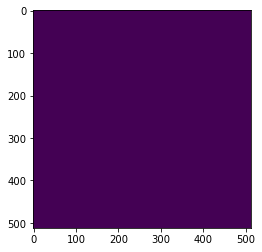

In [ ]:
print(output.cpu().detach().numpy())
plt.imshow(output[0].cpu().detach().numpy().reshape(512,512))